In [148]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import xlabel
from pandas import DataFrame
import pandas as pd
import json
import matplotlib.pyplot as plt
from sympy.strategies.core import switch
from torch import layout


# loading the file into JSON
def load_json(json_file: str) -> DataFrame:
    with open(json_file) as f:
        d = json.load(f)
    df = pd.DataFrame(d)
    temp = pd.json_normalize(d, record_path =['runs'])
    return pd.concat([df.drop(['runs'], axis = 1), temp], axis = 1)

size = [r'results_pythia-70m-20250102-164815.json', r'results_pythia-160m-20250102-165649.json', r'results_pythia-410m-20250102-170622.json', r'results_pythia-1b-20250102-175058.json', r'results_pythia-1.4b-20250102-181726.json', r'results_pythia-2.8b-20250103-135937.json', r'results_pythia-6.9b-20250103-142934.json']
architecture = [
        r'results_pythia-2.8b-20250103-135937.json',
        r'results_pythia-2.8b-20250107-122538.json',
        r'results_pythia-2.8b-20250107-123042.json',
        r'results_pythia-2.8b-20250107-123228.json',
        r'results_pythia-2.8b-20250107-123416.json',
        r'results_pythia-2.8b-20250107-123605.json',
        r'results_pythia-2.8b-20250107-123754.json',
        r'results_pythia-2.8b-20250107-123943.json',
        r'results_pythia-2.8b-20250107-124132.json',
        r'results_pythia-2.8b-20250107-124320.json',
        r'results_pythia-2.8b-20250107-124505.json',

        r'results_Bloom-20250103-180745.json',
        r'results_Bloom-20250107-140437.json',
        r'results_Bloom-20250107-140620.json',
        r'results_Bloom-20250107-140805.json',
        r'results_Bloom-20250107-140952.json',
        r'results_Bloom-20250107-141139.json',
        r'results_Bloom-20250107-141327.json',
        r'results_Bloom-20250107-141516.json',
        r'results_Bloom-20250107-141704.json',
        r'results_Bloom-20250107-141854.json',
        r'results_Bloom-20250107-142042.json',

        r'results_Dolly V2-20250103-173629.json',
        r'results_Dolly V2-20250107-112256.json',
        r'results_Dolly V2-20250107-112742.json',
        r'results_Dolly V2-20250107-112925.json',
        r'results_Dolly V2-20250107-113111.json',
        r'results_Dolly V2-20250107-113258.json',
        r'results_Dolly V2-20250107-113446.json',
        r'results_Dolly V2-20250107-113633.json',
        r'results_Dolly V2-20250107-113820.json',
        r'results_Dolly V2-20250107-114008.json',
        r'results_Dolly V2-20250107-114157.json',

        r'results_redPajama-20250103-184003.json',
        r'results_redPajama-20250107-131020.json',
        r'results_redPajama-20250107-131525.json',
        r'results_redPajama-20250107-131712.json',
        r'results_redPajama-20250107-131900.json',
        r'results_redPajama-20250107-132050.json',
        r'results_redPajama-20250107-132240.json',
        r'results_redPajama-20250107-132432.json',
        r'results_redPajama-20250107-132623.json',
        r'results_redPajama-20250107-132813.json',
        r'results_redPajama-20250107-133002.json',
     ]
rr = [r'results_rr_pythia-70m-20250105-131011.json', r'results_rr_pythia-1b-20250105-132355.json', r'results_rr_pythia-2.8b-20250105-134808.json']


dfs = []
for f in size:
    dfs.append(load_json(f))
size_df = pd.concat(dfs, ignore_index=True, sort=False)

dfs = []
for f in architecture:
    dfs.append(load_json(f))
arch_df = pd.concat(dfs, ignore_index=True, sort=False)

size_df

,benchmark_name,timestamp,cpu_count,cpu_model,gpu_count,gpu_model,os,country_name,country_iso_code,region,...,total_ram_energy,name,passes,model,dataset,timestamp,duration,cpu_energy,gpu_energy,ram_energy
0,pythia-70m-20250102-164815,20250102-165642,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.001963,vLLM-pythia-70m,1,EleutherAI/pythia-70m,Rowan/hellaswag,2025-01-02T16:51:45,0.743793,0.000009,0.000020,0.000005
1,pythia-70m-20250102-164815,20250102-165642,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.001963,vLLM-pythia-70m,5,EleutherAI/pythia-70m,Rowan/hellaswag,2025-01-02T16:51:47,0.578571,0.000007,0.000029,0.000004
2,pythia-70m-20250102-164815,20250102-165642,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.001963,vLLM-pythia-70m,10,EleutherAI/pythia-70m,Rowan/hellaswag,2025-01-02T16:51:49,0.844640,0.000010,0.000042,0.000005
3,pythia-70m-20250102-164815,20250102-165642,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.001963,vLLM-pythia-70m,20,EleutherAI/pythia-70m,Rowan/hellaswag,2025-01-02T16:51:51,1.257370,0.000015,0.000040,0.000008
4,pythia-70m-20250102-164815,20250102-165642,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.001963,vLLM-pythia-70m,40,EleutherAI/pythia-70m,Rowan/hellaswag,2025-01-02T16:51:54,1.855819,0.000022,0.000060,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,pythia-6.9b-20250103-142934,20250103-155158,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.029325,vLLM-pythia-6.9b,200,EleutherAI/pythia-6.9b,Rowan/hellaswag,2025-01-03T14:40:45,102.317622,0.001208,0.009082,0.000668
73,pythia-6.9b-20250103-142934,20250103-155158,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.029325,vLLM-pythia-6.9b,500,EleutherAI/pythia-6.9b,Rowan/hellaswag,2025-01-03T14:44:59,252.499164,0.002981,0.022157,0.001649
74,pythia-6.9b-20250103-142934,20250103-155158,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.029325,vLLM-pythia-6.9b,1000,EleutherAI/pythia-6.9b,Rowan/hellaswag,2025-01-03T14:53:26,505.497788,0.005968,0.044172,0.003301
75,pythia-6.9b-20250103-142934,20250103-155158,32,13th Gen Intel(R) Core(TM) i9-13900K,2,2 x NVIDIA GeForce RTX 3090,Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39,Netherlands,NLD,None,...,0.029325,vLLM-pythia-6.9b,2000,EleutherAI/pythia-6.9b,Rowan/hellaswag,2025-01-03T15:10:13,1006.443911,0.011882,0.087410,0.006571


array([[<Axes: title={'center': 'EleutherAI/pythia-1.4b'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>,
        <Axes: title={'center': 'EleutherAI/pythia-160m'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>],
       [<Axes: title={'center': 'EleutherAI/pythia-1b'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>,
        <Axes: title={'center': 'EleutherAI/pythia-2.8b'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>],
       [<Axes: title={'center': 'EleutherAI/pythia-410m'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>,
        <Axes: title={'center': 'EleutherAI/pythia-6.9b'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>],
       [<Axes: title={'center': 'EleutherAI/pythia-70m'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>,
        <Axes: xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>]],
      dtyp

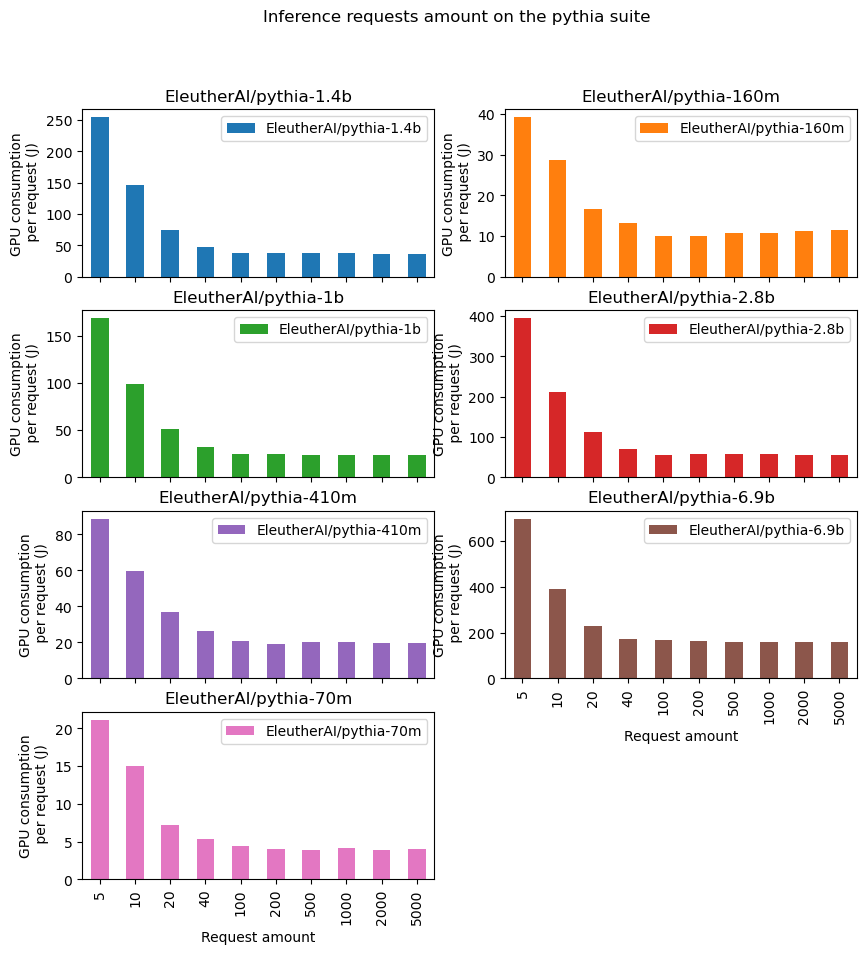

In [145]:
def set_param(row):
    match row['model']:
        case 'EleutherAI/pythia-70m':
            return 70000000
        case 'EleutherAI/pythia-160m':
            return 160000000
        case 'EleutherAI/pythia-410m':
            return 410000000
        case 'EleutherAI/pythia-1b':
            return 1000000000
        case 'EleutherAI/pythia-1.4b':
            return 1400000000
        case 'EleutherAI/pythia-2.8b':
            return 2800000000
        case 'EleutherAI/pythia-6.9b':
            return 6900000000


size_df['gpu_energy_joules'] = size_df['gpu_energy']*3600000
size_df['gpu_energy_per_pass'] = size_df['gpu_energy_joules']/size_df['passes']
size_df['params'] = size_df.apply(set_param, axis=1)

mask = size_df['passes'].isin([1])
plot_df = size_df[~mask]
pd.pivot_table(plot_df, index='passes', values='gpu_energy_per_pass', columns='model').plot(kind='bar', layout=(4,2), subplots=True, figsize=(10, 10), title='Inference requests amount on the pythia suite', ylabel='GPU consumption\n per request (J)', xlabel='Request amount')


array([[<Axes: title={'center': '100'}, xlabel='model', ylabel='GPU consumption\n per request (J)'>]],
      dtype=object)

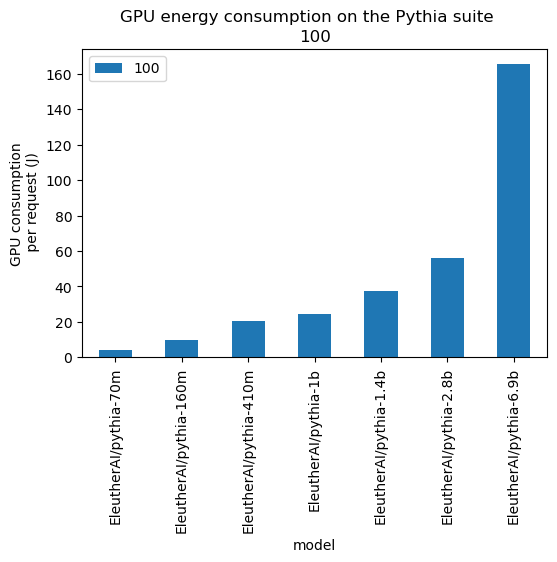

In [123]:
mask = size_df['passes'].isin([1,5, 10, 20, 40, 200, 500, 1000, 2000, 5000])
plot_df = size_df[~mask]
pivot = pd.pivot_table(plot_df, index='model', values='gpu_energy_per_pass', columns='passes').sort_values(by=[100])
pivot.plot(kind='bar', layout=(1,1), subplots=True, figsize=(6, 4),ylabel='GPU consumption\n per request (J)', title='GPU energy consumption on the Pythia suite')

0       70000000
1       70000000
2       70000000
3       70000000
4       70000000
         ...    
72    6900000000
73    6900000000
74    6900000000
75    6900000000
76    6900000000
Name: params, Length: 77, dtype: int64


<Axes: title={'center': 'GPU energy consumption on the Pythia suite'}, xlabel='params', ylabel='GPU consumption\n per request (J)'>

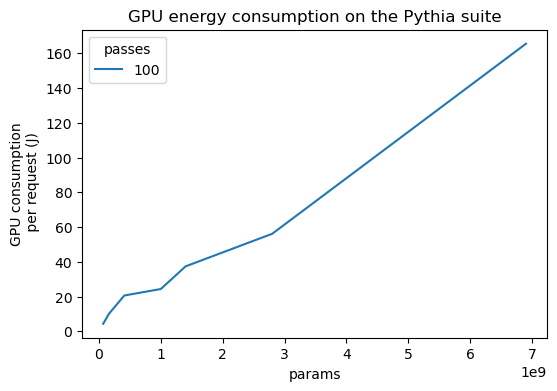

In [146]:
mask = size_df['passes'].isin([1,5, 10, 20, 40, 200, 500, 1000, 2000, 5000])
plot_df = size_df[~mask]
print(size_df['params'])
pivot = pd.pivot_table(plot_df, index='params', values='gpu_energy_per_pass', columns='passes').sort_values(by=[100])
pivot.plot(figsize=(6, 4),ylabel='GPU consumption\n per request (J)', title='GPU energy consumption on the Pythia suite')

array([[<Axes: title={'center': 'EleutherAI/pythia-2.8b'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>,
        <Axes: title={'center': 'bigscience/bloom-3b'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>],
       [<Axes: title={'center': 'databricks/dolly-v2-3b'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>,
        <Axes: title={'center': 'togethercomputer/RedPajama-INCITE-Base-3B-v1'}, xlabel='Request amount', ylabel='GPU consumption\n per request (J)'>]],
      dtype=object)

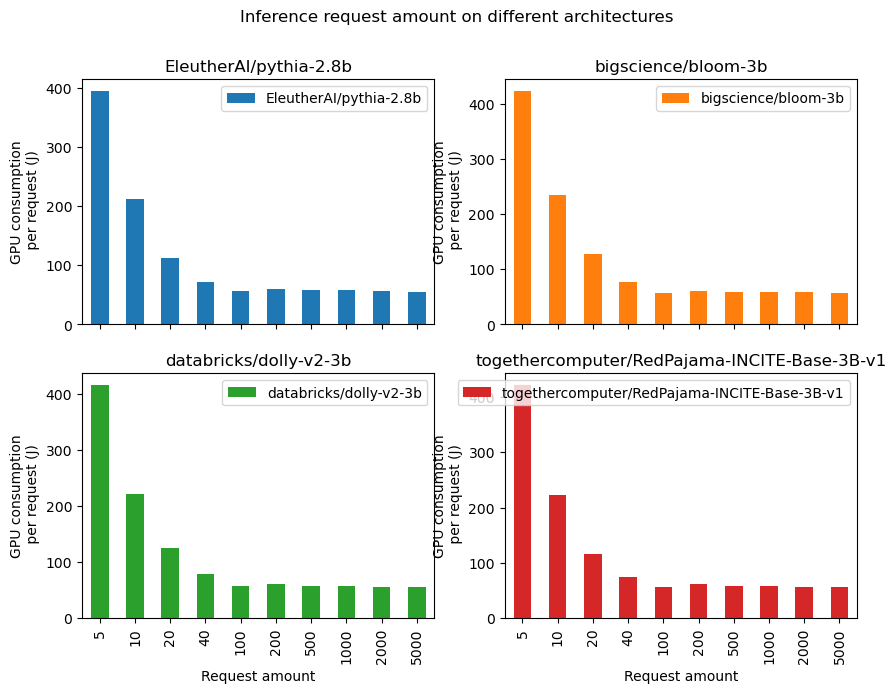

In [152]:
arch_df['gpu_energy_joules'] = arch_df['gpu_energy']*3600000
arch_df['gpu_energy_per_pass'] = arch_df['gpu_energy_joules']/arch_df['passes']

mask = arch_df['passes'].isin([1])
plot_df = arch_df[~mask]
pd.pivot_table(plot_df, index='passes', values='gpu_energy_per_pass', columns='model').plot(kind='bar',ylabel='GPU consumption\n per request (J)', xlabel='Request amount', layout=(2,2), subplots=True, figsize=(10, 7), title='Inference request amount on different architectures')

                                          model       mean       std
0                        EleutherAI/pythia-2.8b  55.585646  1.991370
1                           bigscience/bloom-3b  57.188894  1.441065
2                        databricks/dolly-v2-3b  57.141059  1.289017
3  togethercomputer/RedPajama-INCITE-Base-3B-v1  56.800154  1.231055


array([[<Axes: title={'center': 'mean'}, xlabel='model', ylabel='GPU consumption\n per request (J)'>]],
      dtype=object)

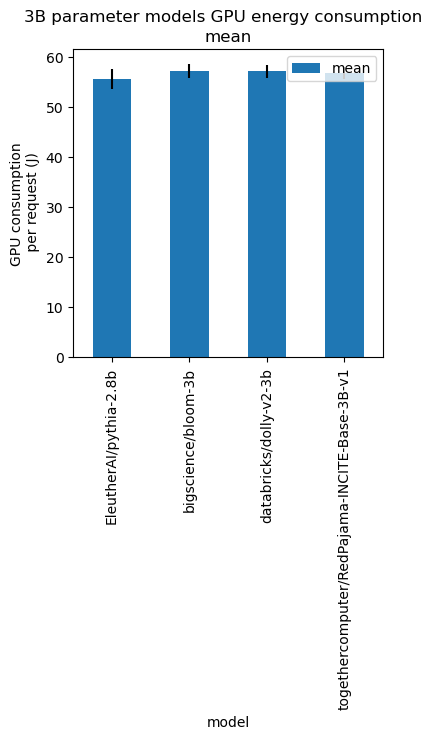

In [160]:
import numpy as np

mask = arch_df['passes'].isin([1,5, 10, 20, 40, 200, 500, 1000, 2000, 5000])
plot_df = arch_df[~mask]
df_average = plot_df.groupby(['model'])['gpu_energy_per_pass'].agg(['mean', 'std']).reset_index()
print(df_average)


df_average.plot('model', 'mean', yerr='std', kind='bar', layout=(1,1), subplots=True, figsize=(4, 4), ylabel='GPU consumption\n per request (J)', title='3B parameter models GPU energy consumption')
